# Applied Data Science Capstone - Finding potential Neighborhoods in NewYork

## 1.Business Problem

New York (NY), is the most populous city in the United States. With an estimated 2018 population of 8,398,748 distributed over a land area of about 302.6 square miles. New York metropolitan area is the largest metropolitan area in the world by urban landmass and is one of the world's most populous megacities. People have travelled  from various parts of the world and inhabited New York.  

As different immigrants come from different nations in New York, they bring with them different and unique cultures and food cuisines. Different cuisines are not only liked by foreign born residents of New York but also by the natives in the city who like trying different food items. Opening a  foreign-based food cuisine restaurant in New York would thus be a good business idea.  
Indian cuisine reflects an 8,000-year history of various groups and cultures interacting with the Indian subcontinent, leading to diversity of flavours and regional cuisines found in modern-day India. Later, trade with British and Portuguese influence added to the already diverse Indian cuisine.  
In this project we Analyse different neighborhoods in New York city and conclude which would be a good neighborhood to open an Indian food restaurant.  The project would be helpful for **audience** who have moved from India or South Asia to New York and are looking to set up restaurant business in the city. For example: Let us say a person has moved from India to permanently live in New York and now he wishes to set up an Indian Food restaurant in New York to earn his living. The Analysis would provide the audience insights about various neighborhoods in New York city and help them in making decision about which neighborhood would be most suitable to start their business. For Example: The person who has moved from India to New York can make out from the analysis that :  
* which neighborhoods have maximum number of Indian Restaurants,   
* which neighborhood has minimum number of restaurants,   
* which Neighborhood is best for setting up new business,   
* how much competition is there in the neighborhood from other Indian Restaurants(this can be seen by viewing the rating).

## 2. Data

To analyse our data and reach a conclusion, we first need to prepare our data. Data preparation includes: cleaning the data and getting the data to a stage where it may be easier to work with the data. we deal will invalid and missing values in our data set in data prepration.   
Here we will convert addresses into their equivalent latitude and longitude values and **use Foursquare API** to explore neighborhoods in New York City. We will use the Location intelligence provided by Foursquare API to provide a solution to our client.

In order to segement the neighborhoods and explore them, we will essentially need a dataset that contains the all the boroughs and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood. We can load the data from  https://cocl.us/new_york_dataset and we can then use geopy library to get the latitude and longitude values of New York City. we can explore the restaurants in the neighborhood, after the required data is ready i.e:  
* we have the latitudes and longitudes of all the neighborhoods
* we have structured data ready in the form of a table having columns: Boroughs, Neighborhood,Latitude,Longitude
* we have generated our Foursquare credentials i.e client_id and client_secret.  

Once our data is prepared, we can **extract various features from our data using the Foursquare API** like:  
* getting the venues(restaurants) within a specified radius.
* filtering indian restaurants within that radius.
* getting venue details like tip count, likes count for a given venue id  
* finding the ratings of different Indian cuisine restaurants in the area which can furthus help the client who is trying to establish a new business in New York
* getting the photos of food items of different venues.
* Find Tips for each Indian restaurant
All this information can help our client to get an idea about the present market of indian cuisine restaurants and prepare better in launching his or her own restaurant.

#### Preparing our data:

In [1]:
#importing the required libraries

import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json 
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 
import requests 
from pandas.io.json import json_normalize 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
!conda install -c conda-forge folium=0.5.0 --yes 
import folium 
!pip install BeautifulSoup4
from bs4 import BeautifulSoup
print('Required Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.21.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

#### Getting the New York city data

In [3]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data has been downloaded!')

Data has been downloaded!


In [4]:
#loading the data
import json
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [5]:
# defining a new variable that includes the feature key from the data.
neighborhoods_data = newyork_data['features']

In [6]:
# looking at the first item in our data
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

#### Transform the data of nested Python dictionaries into a pandas dataframe. 

In [7]:
# creating an empty dataframe
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [8]:
# looping through the data to fill the dataframe one row at a time.
for x in neighborhoods_data:
    borough = neighborhood_name = x['properties']['borough'] 
    neighborhood_name = x['properties']['name']
        
    neighborhood_latlon = x['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [9]:
# examining our resultant dataframe
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [9]:
# now we Use geopy library to get the latitude and longitude values of New York City
#In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent ny_explorer

address = 'New York City, NY'

geolocator = Nominatim(user_agent="our_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The coordinate are {}, {}.'.format(latitude, longitude))



The coordinate are 40.7127281, -74.0060152.


In [10]:
# creating a  map of New York using latitude and longitude values and superimposing Neighborhoods on Top
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=8)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='orange',
        fill=True,
        fill_color='red',
        fill_opacity=0.5,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

#### Now we have Neighborhoods and Boroughs visualized on a Map. Let us visualize the number of Neighborhoods in each Borough.

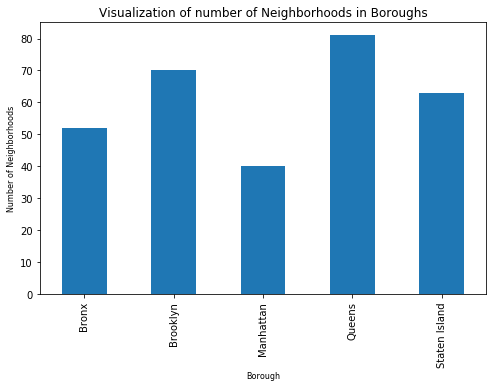

In [11]:
# now let us find out the number of neighborhoods in each borough
plt.figure(figsize=(8,5))
plt.title('Visualization of number of Neighborhoods in Boroughs')
plt.xlabel('Boroughs', fontsize = 8)
plt.ylabel('Number of Neighborhoods', fontsize=8)
neighborhoods.groupby('Borough')['Neighborhood'].count().plot(kind='bar')
plt.show()


#### We can see that Queens has the highest number of Neighborhoods, followed by Brooklyn and Staten Island. where as Bronx and Manhatten have least number of Neighborhoods.

#### Defining our FourSquare credentials  which allow us to utilize Foursquare API to explore and segment neighborhoods

In [10]:
# specifying Foursquare API credentials
CLIENT_ID = 'VWMDEJXPETXNGOR144HADV0CG1PHNNJR2GNLQZAJF1VWSLLY' # Foursquare ID
CLIENT_SECRET = 'SID03PN4O3YGJLPJ2EOJQPEK4BW2YRYWBWSRIPGPQWHTHJ0P' # Foursquare Secret
VERSION = '20180605' # Foursquare API version
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

# Now, we can utilize the Foursquare API to explore the neighborhoods and segment them

Your credentails:
CLIENT_ID: VWMDEJXPETXNGOR144HADV0CG1PHNNJR2GNLQZAJF1VWSLLY
CLIENT_SECRET:SID03PN4O3YGJLPJ2EOJQPEK4BW2YRYWBWSRIPGPQWHTHJ0P


#### Defining get_venues function
#### get_venues: Function to return Venue_id, Venue_name and Category within a specified radius for a given Latitude and Longitude

In [11]:
def get_venues(lat,lng):
    
    #set variables
    radius=1000
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

#### exploring  a venue furthur with the help of a function
#### function name : get_venue_details  
the function gets venue details like like count , rating , tip counts for a given venue id. This can later be used for ranking.

In [12]:
def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

Since our client wants to open an indian food restaurant, thus we have to filter out all the indian food restaurants from our fetched data

In [13]:
# Filtering Indian restaurants from the list of neighborhoods 
column_names=['Borough', 'Neighborhood', 'ID','Name']
indian_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in neighborhoods.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    indian_resturants=venues[venues['Category']=='Indian Restaurant']   
    print('(',count,'/',len(newyork_data),')','Indian Resturants in '+Neighborhood+', '+Borough+':'+str(len(indian_resturants)))
    for resturant_detail in indian_resturants.values.tolist():
        id, name , category=resturant_detail
        indian_rest_ny = indian_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 5 ) Indian Resturants in Wakefield, Bronx:0
( 2 / 5 ) Indian Resturants in Co-op City, Bronx:0
( 3 / 5 ) Indian Resturants in Eastchester, Bronx:0
( 4 / 5 ) Indian Resturants in Fieldston, Bronx:0
( 5 / 5 ) Indian Resturants in Riverdale, Bronx:0
( 6 / 5 ) Indian Resturants in Kingsbridge, Bronx:0
( 7 / 5 ) Indian Resturants in Marble Hill, Manhattan:0
( 8 / 5 ) Indian Resturants in Woodlawn, Bronx:1
( 9 / 5 ) Indian Resturants in Norwood, Bronx:0
( 10 / 5 ) Indian Resturants in Williamsbridge, Bronx:1
( 11 / 5 ) Indian Resturants in Baychester, Bronx:0
( 12 / 5 ) Indian Resturants in Pelham Parkway, Bronx:0
( 13 / 5 ) Indian Resturants in City Island, Bronx:0
( 14 / 5 ) Indian Resturants in Bedford Park, Bronx:0
( 15 / 5 ) Indian Resturants in University Heights, Bronx:0
( 16 / 5 ) Indian Resturants in Morris Heights, Bronx:0
( 17 / 5 ) Indian Resturants in Fordham, Bronx:0
( 18 / 5 ) Indian Resturants in East Tremont, Bronx:0
( 19 / 5 ) Indian Resturants in West Farms, Bronx:0


In [14]:
indian_rest_ny.shape

(153, 4)

Our data consists of 153 rows and 4 columns

In [15]:
indian_rest_ny.head(10)

,Borough,Neighborhood,ID,Name
0,Bronx,Woodlawn,4c0448d9310fc9b6bf1dc761,Curry Spot
1,Bronx,Williamsbridge,570c3a3fcd10eecd0d0434cd,Agra Grill
2,Bronx,Parkchester,4c194631838020a13e78e561,Melanies Roti Bar And Grill
3,Bronx,Spuyten Duyvil,4c04544df423a593ac83d116,Cumin Indian Cuisine
4,Bronx,Concourse,551b7f75498e86c00a0ed2e1,Hungry Bird
5,Bronx,Unionport,4c194631838020a13e78e561,Melanies Roti Bar And Grill
6,Brooklyn,Bay Ridge,4b5a4dc8f964a520a2bb28e3,Taj Mahal
7,Brooklyn,Brighton Beach,4af0d31bf964a5207ddf21e3,Pak Nasheman
8,Brooklyn,Flatbush,52213c4211d295d4c57a607c,Ashoka Grill
9,Brooklyn,Flatbush,564d283d498e6e851df79d87,Great Indian Curry


#### let us now visualize the number of indian restaurants in each Borough

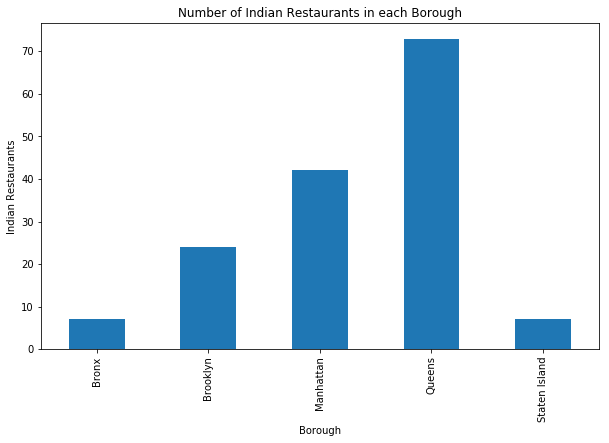

In [20]:
# number of indian restaurant is each borough
plt.figure(figsize=(10,6))
plt.title('Number of Indian Restaurants in each Borough')
plt.xlabel('Borough', fontsize = 10)
plt.ylabel('Indian Restaurants', fontsize=10)
indian_rest_ny.groupby('Borough')['ID'].count().plot(kind='bar')
plt.show()

#### we can see that Queen's has the highest number of Indian Restaurants followed by Manhatten and Brooklyn whereas Bronx and Staten Island have the least number of Indian Restaurants.


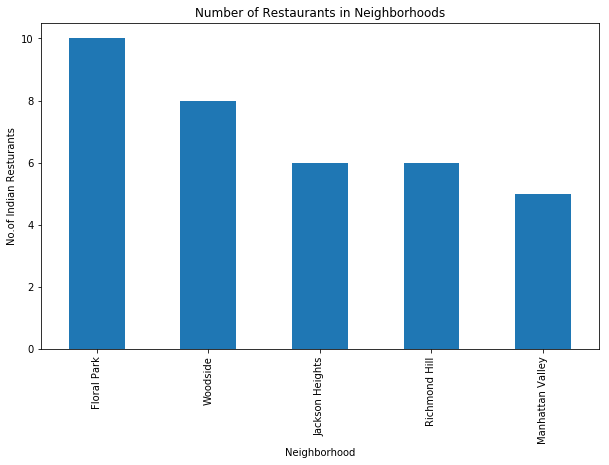

In [21]:
# Finding the top 5 neighborhoods which have the most number of indian restaurants

plt.figure(figsize=(10,6))
plt.title('Number of Restaurants in Neighborhoods')
plt.xlabel('Neighborhood Name', fontsize = 10)
plt.ylabel('No.of Indian Resturants', fontsize=10)
indian_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(5).plot(kind='bar')
# Pandas nlargest() method is used to get n largest values from a data frame or a series.
plt.show()


#### We can observe that Floral Park has the highest number of Restaurants followed by Woodside, Jackson Heights, Ricgmond Hill and Mmanhatten Valley

In [16]:
# considering only Floral Park
indian_rest_ny[indian_rest_ny['Neighborhood']=='Floral Park']

,Borough,Neighborhood,ID,Name
101,Queens,Floral Park,527ffc0811d2d329d5e49abd,Jackson Diner
102,Queens,Floral Park,4e4e3e22bd4101d0d7a5c2d1,Kerala Kitchen
103,Queens,Floral Park,4b647b56f964a520c4b62ae3,Usha Foods & Usha Sweets
104,Queens,Floral Park,4b787c49f964a5209cd12ee3,Santoor Indian Restaurant
105,Queens,Floral Park,4c0c01e0bbc676b00d6b4cd5,Mumbai Xpress
106,Queens,Floral Park,4df0f39dd4c04d0392c853ea,Sagar Chinese
107,Queens,Floral Park,4c76ff35a5676dcb72671721,Flavor Of India
108,Queens,Floral Park,4cc642ed306e224b5bf2a76c,Shahi Darbar
109,Queens,Floral Park,55d68c1b498ecf05fa196fe1,Namaste Restaurant and Cafe
110,Queens,Floral Park,4e6bfe1c7d8b2c711b17bbe5,Surya sweets and snacks


In [21]:
# considering only Woodside
#indian_rest_ny[indian_rest_ny['Neighborhood']=='Woodside']

,Borough,Neighborhood,ID,Name
55,Queens,Woodside,4afdcf29f964a520162b22e3,Rajbhog Sweets
56,Queens,Woodside,4b998d3ff964a520fc8235e3,Maharaja Sweets & Snacks
57,Queens,Woodside,4c7060e734443704ca0e245f,Kababish
58,Queens,Woodside,4b189424f964a52043d423e3,Dera
59,Queens,Woodside,4e334b7bb0fb17f64f81a8b2,Premium Sweets & Restaurant
60,Queens,Woodside,49ebb18ff964a52016671fe3,Delhi Heights
61,Queens,Woodside,5da4fbf091a08400078be19d,Angel Indian Restaurant
62,Queens,Woodside,3fd66200f964a52009f11ee3,Jackson Diner


In [17]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
indian_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1

In [18]:
indian_rest_stats_ny

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips


In [19]:
for row in indian_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row

# prepare neighborhood list that contains indian resturants
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
indian_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1


for row in indian_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except (IndexError, KeyError) as e:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(indian_rest_ny),')','processed')
    indian_rest_stats_ny = indian_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

                         ID        Name  Likes  Rating  Tips
0  4c0448d9310fc9b6bf1dc761  Curry Spot      5     7.6    10
( 1 / 153 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 570c3a3fcd10eecd0d0434cd
( 2 / 153 ) processed
                         ID                         Name  Likes  Rating  Tips
0  4c194631838020a13e78e561  Melanies Roti Bar And Grill      3     6.2     2
( 3 / 153 ) processed
                         ID                  Name  Likes  Rating  Tips
0  4c04544df423a593ac83d116  Cumin Indian Cuisine     13     5.9     9
( 4 / 153 ) processed
                         ID         Name  Likes  Rating  Tips
0  551b7f75498e86c00a0ed2e1  Hungry Bird      8     7.0     3
( 5 / 153 ) processed
                         ID                         Name  Likes  Rating  Tips
0  4c194631838020a13e78e561  Melanies Roti Bar And Grill      3     6.2     2
( 6 / 153 ) processed
                         ID       Name  Likes  Rat

In [20]:
# getting ratings, likes and tips
indian_rest_stats_ny.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,Woodlawn,4c0448d9310fc9b6bf1dc761,Curry Spot,5,7.6,10
1,Bronx,Williamsbridge,0,0,0,0.0,0
2,Bronx,Parkchester,4c194631838020a13e78e561,Melanies Roti Bar And Grill,3,6.2,2
3,Bronx,Spuyten Duyvil,4c04544df423a593ac83d116,Cumin Indian Cuisine,13,5.9,9
4,Bronx,Concourse,551b7f75498e86c00a0ed2e1,Hungry Bird,8,7.0,3


In [21]:

indian_rest_stats_ny.shape

(153, 7)

In [22]:

indian_rest_ny.shape

(153, 4)

In [23]:
# We see that values like Likes, Tips are strig values. We would need to convert them into float for further analysis
indian_rest_stats_ny.info()

indian_rest_stats_ny['Likes']=indian_rest_stats_ny['Likes'].astype('float64')

indian_rest_stats_ny['Tips']=indian_rest_stats_ny['Tips'].astype('float64')

indian_rest_stats_ny['Rating']=indian_rest_stats_ny['Rating'].astype('float64')

indian_rest_stats_ny.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 7 columns):
Borough         153 non-null object
Neighborhood    153 non-null object
ID              153 non-null object
Name            153 non-null object
Likes           153 non-null object
Rating          153 non-null float64
Tips            153 non-null object
dtypes: float64(1), object(6)
memory usage: 8.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 7 columns):
Borough         153 non-null object
Neighborhood    153 non-null object
ID              153 non-null object
Name            153 non-null object
Likes           153 non-null float64
Rating          153 non-null float64
Tips            153 non-null float64
dtypes: float64(3), object(4)
memory usage: 8.4+ KB


In [24]:
# Resturant with maximum Likes
indian_rest_stats_ny.iloc[indian_rest_stats_ny['Likes'].idxmax()]

Borough                        Manhattan
Neighborhood                     Tribeca
ID              4bbb9dbded7776b0e1ad3e51
Name                    Tamarind TriBeCa
Likes                                589
Rating                                 9
Tips                                 148
Name: 42, dtype: object

In [25]:
#Resturant with maximum Rating
indian_rest_stats_ny.iloc[indian_rest_stats_ny['Rating'].idxmax()]

Borough                        Manhattan
Neighborhood                     Tribeca
ID              4bbb9dbded7776b0e1ad3e51
Name                    Tamarind TriBeCa
Likes                                589
Rating                                 9
Tips                                 148
Name: 42, dtype: object

In [26]:
# Resturant with maximum Tips
indian_rest_stats_ny.iloc[indian_rest_stats_ny['Tips'].idxmax()]

Borough                        Manhattan
Neighborhood                     Tribeca
ID              4bbb9dbded7776b0e1ad3e51
Name                    Tamarind TriBeCa
Likes                                589
Rating                                 9
Tips                                 148
Name: 42, dtype: object

In [27]:
ny_neighborhood_stats=indian_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']

In [33]:
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
67,Tribeca,9.00
30,Greenwich Village,8.90
73,West Village,8.85
44,Murray Hill,8.80
11,Chelsea,8.70
25,Fort Greene,8.70
47,North Side,8.50
60,South Side,8.50
2,Bay Ridge,8.40
58,Roosevelt Island,8.30


In [29]:
# finding avg rating for indian restaurants

ny_borough_stats=indian_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']

In [30]:
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
1,Brooklyn,6.162500
2,Manhattan,4.833333
0,Bronx,4.700000
3,Queens,0.000000
4,Staten Island,0.000000


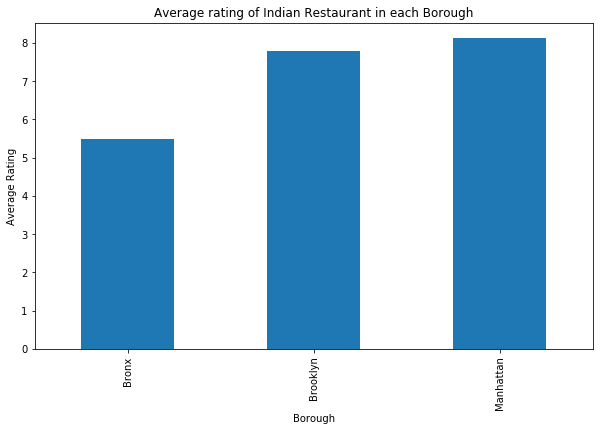

In [50]:
plt.figure(figsize=(10,6))
plt.title('Average rating of Indian Restaurant in each Borough')
plt.xlabel('Borough', fontsize = 10)
plt.ylabel('Average Rating', fontsize=10)
indian_rest_stats_ny.groupby('Borough').mean()['Rating'].plot(kind='bar')
plt.show()

In [35]:
# All the neighborhoods with average rating greater or equal 8.0 to be visualized on map
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=8.0]



In [36]:

ny_neighborhood_stats

,Neighborhood,Average Rating
2,Bay Ridge,8.400000
10,Central Harlem,8.100000
11,Chelsea,8.700000
13,Clinton Hill,8.150000
25,Fort Greene,8.700000
30,Greenwich Village,8.900000
44,Murray Hill,8.800000
47,North Side,8.500000
58,Roosevelt Island,8.300000
60,South Side,8.500000


In [37]:

ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,neighborhoods, on='Neighborhood')

In [38]:

ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]

In [41]:
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(20)

,Borough,Neighborhood,Latitude,Longitude,Average Rating
12,Manhattan,Tribeca,40.721522,-74.010683,9.000000
6,Manhattan,Greenwich Village,40.726933,-73.999914,8.900000
15,Manhattan,West Village,40.734434,-74.006180,8.850000
8,Queens,Murray Hill,40.764126,-73.812763,8.800000
7,Manhattan,Murray Hill,40.748303,-73.978332,8.800000
2,Manhattan,Chelsea,40.744035,-74.003116,8.700000
3,Staten Island,Chelsea,40.594726,-74.189560,8.700000
5,Brooklyn,Fort Greene,40.688527,-73.972906,8.700000
11,Brooklyn,South Side,40.710861,-73.958001,8.500000
9,Brooklyn,North Side,40.714823,-73.958809,8.500000


In [42]:
# create map and display it
ny_map = folium.Map(location=(40.693943, -73.985880), zoom_start=12)\


# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [43]:
# showing average neighborhood ratings on map 
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood'] +', '+ny_neighborhood_stats['Borough'] +'('+ny_neighborhood_stats['Average Rating'].map(str)+')'

In [44]:
# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add incidents to map
ny_map.add_child(incidents)

#### Conclusion

From the above analysis by looking at the Bar plots and Ratings we can conclude that:  
1. Queens has the Maximum number of Indian Restaurants
2. Tribeca, Manhattan has the Highest Average Rating for Indian Restaurants.
3. Manhattan has some of the top rated Indian restaurants
4. Brooklyn also has many high rated Indian Restaurants
5. Manhattan and Brooklyn would be good neighborhoods to stay if you want to try Indian cuisine in New York. 
6. Tribeca, Manhattan Would be a Good choice to start a New Indian Restaurant.
7. North and South Side in Brooklyn would also be good option as they have Rating ~ 8.5 which provides a less competitive market to open a new Business.
